In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib import cm, colors

In [ ]:
prefix = "DD20"       # set to TDD for Thawing Degree Days

config = {
    "TDD": {
        "deltaT": 32
    },
    "DD20": {
        "deltaT": 20
    },
    "DD25": {
        "deltaT": 25
    },
}

PROJPATH = Path().resolve().parent
breakupdata = PROJPATH / "data/breakupdata/derived"
stationdata = PROJPATH / f"data/weatherstations/ACIS/{prefix}/dd_climatologies"

In [ ]:
stations_ddclim = stationdata.glob("*.csv")
stations_ddclim_list = list(stations_ddclim)

## Prototyping

In [ ]:
testdata = pd.read_csv(stations_ddclim_list[3], skiprows=4, index_col=0)
testdata

,Tavg_F,dd
d_since_march1,,
0,7.33,0.00
1,4.54,0.00
2,5.13,0.00
3,6.68,0.00
4,8.46,0.00
...,...,...
117,61.28,41.28
118,60.83,40.83
119,60.87,40.87


In [ ]:
stationname = stations_ddclim_list[3].stem[:-14]
testdf = pd.DataFrame(testdata['dd'].cumsum())
testdf.columns = [stationname]
testdf

,COLLEGE_OBSERVATORY
d_since_march1,
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
117,2304.48
118,2345.31
119,2386.18


<AxesSubplot: xlabel='d_since_march1', ylabel='COLLEGE_OBSERVATORY'>

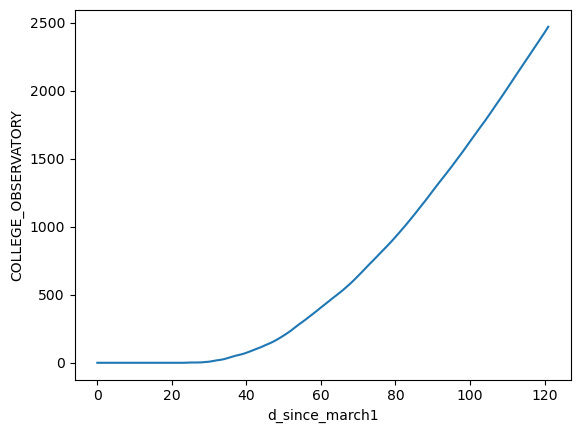

In [ ]:
sb.lineplot(data=testdf[stationname])

### Loop

In [ ]:
alldd = []
for fpth in stations_ddclim_list:
    stationname = fpth.stem[:-14]
    testdata = pd.read_csv(fpth, skiprows=4, index_col=0)
    testdf = pd.DataFrame(testdata['dd'].cumsum())
    testdf.columns = [stationname]
    alldd.append(testdf)

Text(0, 0.5, 'Degree days > 20 (F)')

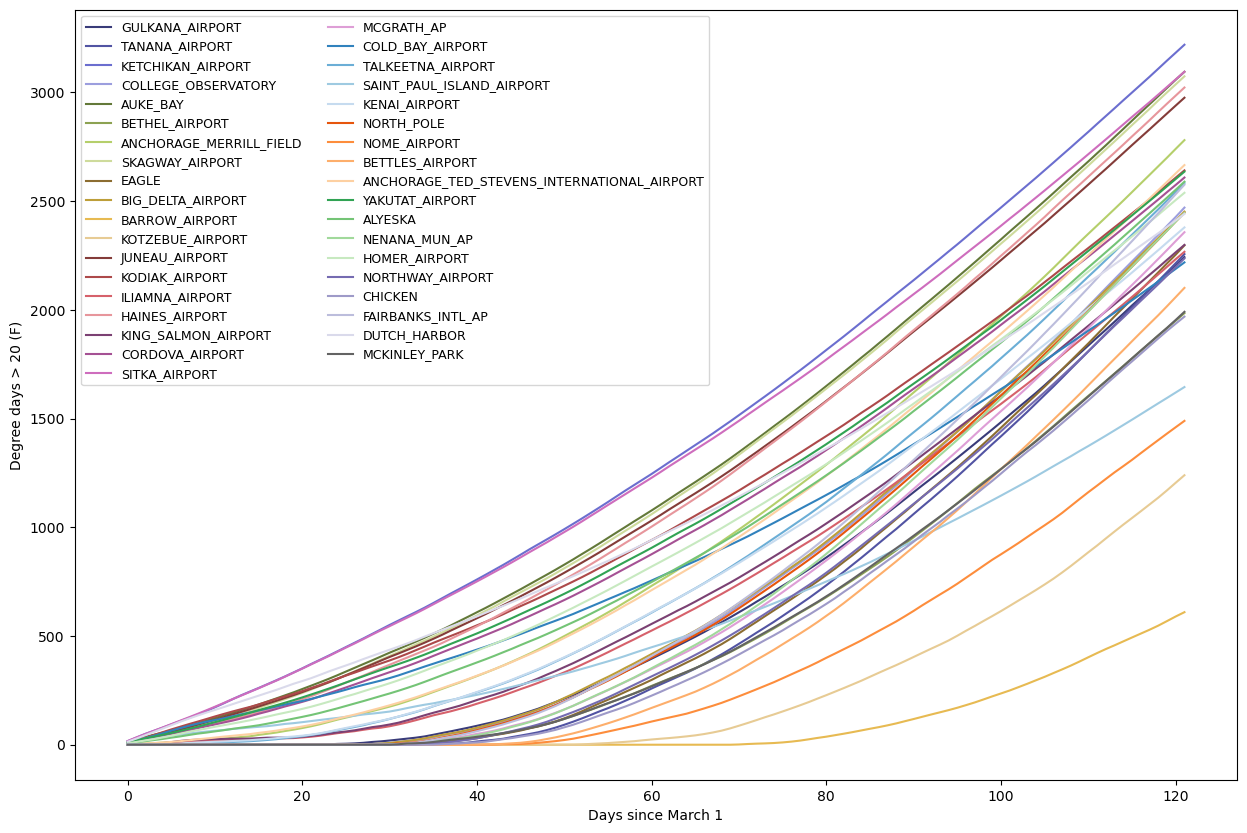

In [ ]:
clrs = plt.cm.rainbow(np.linspace(0, 1, len(alldd)))
clrs = plt.cm.tab20b.colors + plt.cm.tab20c.colors

fig, ax = plt.subplots(figsize=(15, 10))
pd.concat(alldd, axis=1).plot(ax=ax, legend=False, color=clrs)
ax.legend(fontsize=9, ncol=2, loc='upper left')
ax.set_xlabel('Days since March 1')
ax.set_ylabel(f'Degree days > {config[prefix]["deltaT"]} (F)')


In [ ]:
allcumulddds = pd.concat(alldd, axis=1)
allcumulddds

,GULKANA_AIRPORT,TANANA_AIRPORT,KETCHIKAN_AIRPORT,COLLEGE_OBSERVATORY,AUKE_BAY,BETHEL_AIRPORT,ANCHORAGE_MERRILL_FIELD,SKAGWAY_AIRPORT,EAGLE,BIG_DELTA_AIRPORT,...,ANCHORAGE_TED_STEVENS_INTERNATIONAL_AIRPORT,YAKUTAT_AIRPORT,ALYESKA,NENANA_MUN_AP,HOMER_AIRPORT,NORTHWAY_AIRPORT,CHICKEN,FAIRBANKS_INTL_AP,DUTCH_HARBOR,MCKINLEY_PARK
d_since_march1,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,16.30,0.00,12.10,0.00,0.46,10.31,0.00,0.00,...,2.05,10.87,6.11,0.00,5.97,0.00,0.00,0.00,13.86,0.00
1,0.00,0.00,32.65,0.00,24.24,0.00,2.44,20.66,0.00,0.00,...,4.03,20.47,11.34,0.00,12.81,0.00,0.00,0.00,28.21,0.00
2,0.00,0.00,49.33,0.00,35.65,0.00,5.18,31.14,0.00,0.00,...,5.61,28.95,16.36,0.00,19.50,0.00,0.00,0.00,43.46,0.00
3,0.00,0.00,63.84,0.00,45.70,0.00,7.01,40.49,0.00,0.00,...,7.43,36.90,21.41,0.00,25.71,0.00,0.00,0.00,58.73,0.00
4,0.00,0.00,78.42,0.00,55.60,0.00,9.79,49.07,0.00,0.00,...,10.08,45.42,26.46,0.00,33.42,0.00,0.00,0.00,74.14,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2092.82,2092.45,3072.02,2304.48,2945.59,1846.82,2620.82,2924.36,2132.08,2290.79,...,2512.22,2501.16,2444.05,2283.14,2404.11,2079.82,1833.69,2402.41,2324.20,1847.51
118,2129.61,2132.31,3109.10,2345.31,2982.85,1881.20,2660.45,2962.84,2172.54,2330.00,...,2550.34,2534.38,2480.24,2323.26,2437.23,2118.09,1868.69,2444.81,2352.52,1882.85
119,2166.44,2173.10,3146.48,2386.18,3020.80,1915.63,2699.95,3000.26,2213.65,2370.12,...,2588.82,2568.21,2516.06,2363.71,2471.23,2157.32,1903.43,2488.06,2381.57,1917.44


In [ ]:
outpath = PROJPATH / f"data/weatherstations/ACIS/{prefix}/"
fn = "all_cumul_clim1991_2020.csv"

with open(outpath / fn, 'w') as dst:
    dst.write(f"# All climatologies for cumulative degree days > {config[prefix]['deltaT']}, 1991-2020\n")
    dst.write(f"# Cumulative degree days starting March 1 from ACIS\n")
    dst.write("#\n")
    pd.concat(alldd, axis=1).to_csv(dst, float_format='%.2f')